In [1]:
#import all of the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

C:\Users\HUZAIFA\miniconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\HUZAIFA\miniconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\HUZAIFA\miniconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# read the data from CSV file

data = pd.read_csv('zameen-updated.csv')

In [3]:
# print first 5 rows of the dataset

data.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [4]:
# rename column names to make them consistent with others

data.rename(columns={'Area Type': 'area_type', 'Area Size': 'area_size', 'Area Category': 'area_category'}, inplace=True)
data.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,area_type,area_size,area_category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [5]:
# print the shape of the dataset

data.shape

(168446, 20)

- It shows that we have <b>168446 rows</b> and <b>20 columns</b>

In [6]:
# describe() is used to view some basic statistical details

data.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,area_size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


- It helps you to see different statistical quantities like <b> percentile, mean, std etc. of a data frame or a series of numeric values.</b> and others

In [7]:
# info() method is used to see the shape of object types of our data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  area_type      168446 non-nul

- This allows you to see whether a column contains null values or not, what are the datatypes etc.
- It's really important to see the datatypes because sometimes you need to convert data into appropriate type for faster processing (like Data in string format to date type)

In [8]:
# count shows the count of values in each column

data.count()

property_id      168446
location_id      168446
page_url         168446
property_type    168446
price            168446
location         168446
city             168446
province_name    168446
latitude         168446
longitude        168446
baths            168446
area             168446
purpose          168446
bedrooms         168446
date_added       168446
agency           124375
agent            124374
area_type        168446
area_size        168446
area_category    168446
dtype: int64

In [9]:
# corr method shows the correlation in a numerical matrix

data.corr()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,area_size
property_id,1.000000,0.006564,-0.029669,-0.010461,-0.002722,-0.101769,-0.066577,0.002448
location_id,0.006564,1.000000,-0.098426,-0.293129,-0.282903,-0.121941,-0.138452,0.044766
price,-0.029669,-0.098426,1.000000,-0.071193,-0.019225,0.230205,0.314145,-0.009549
latitude,-0.010461,-0.293129,-0.071193,1.000000,0.926888,0.053107,0.030961,-0.014124
longitude,-0.002722,-0.282903,-0.019225,0.926888,1.000000,0.099506,0.079962,-0.032820
baths,-0.101769,-0.121941,0.230205,0.053107,0.099506,1.000000,0.669210,0.018705
bedrooms,-0.066577,-0.138452,0.314145,0.030961,0.079962,0.669210,1.000000,0.032152
area_size,0.002448,0.044766,-0.009549,-0.014124,-0.032820,0.018705,0.032152,1.000000


- You can see that <b>baths and bedrooms</b> are correlated with price

<AxesSubplot:>

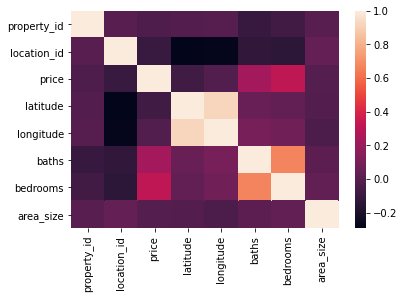

In [10]:
# plot the correlation using seaborn library's heatmap method

corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

<AxesSubplot:>

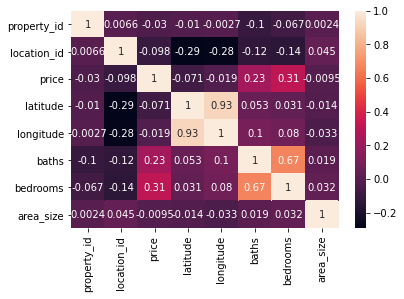

In [11]:
# same thing but showing values on the heatmap

sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True)

In [12]:
# Seeing unique values in each column for analysis

data.nunique()

property_id      168446
location_id        4198
page_url         168446
property_type         7
price              2077
location           1509
city                  5
province_name         3
latitude           7838
longitude          8316
baths                16
area                344
purpose               2
bedrooms             23
date_added          124
agency             5761
agent             10598
area_type             2
area_size           247
area_category        22
dtype: int64

- You can see different categories in all of the columns and unique values in continous columns

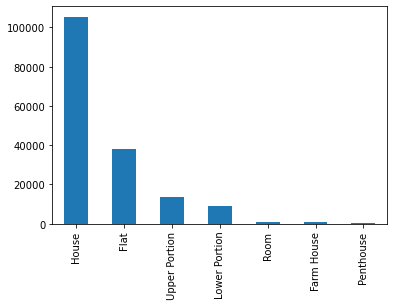

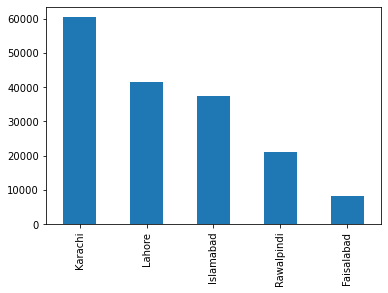

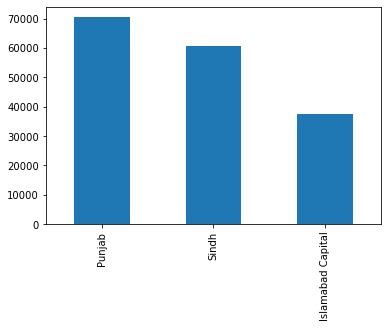

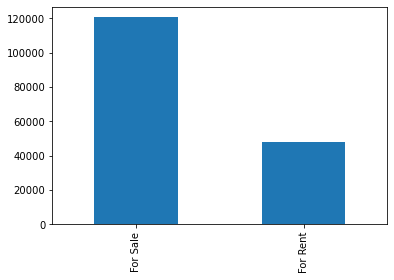

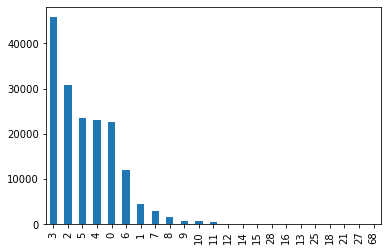

In [13]:
# visualise the count of each category in categorical columns

categorical_features = ["property_type","city","province_name","purpose","bedrooms"]

for i, categorical_feature in enumerate(data[categorical_features]):
    data[categorical_feature].value_counts().plot(kind="bar")
    plt.show()

- You can see count of different categories in above graphs

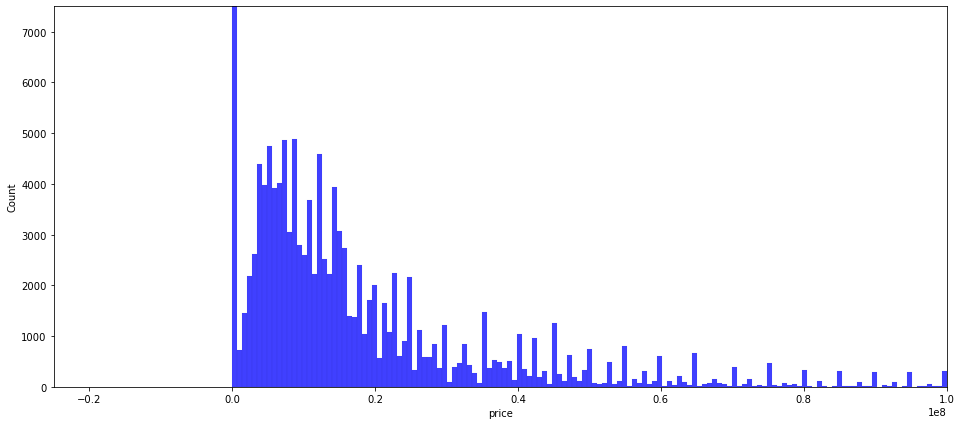

In [84]:
# seeing distribution of price in the dataset

fig, ax = plt.subplots(figsize=(16,7))
sns.histplot(data['price'],color = 'blue')
plt.ylim(0, 7500)
plt.xlim(-25000000, 100000000)
plt.show()

- You can see that most of the values are concentrated between 0 and 50000000 

<AxesSubplot:xlabel='date_added'>

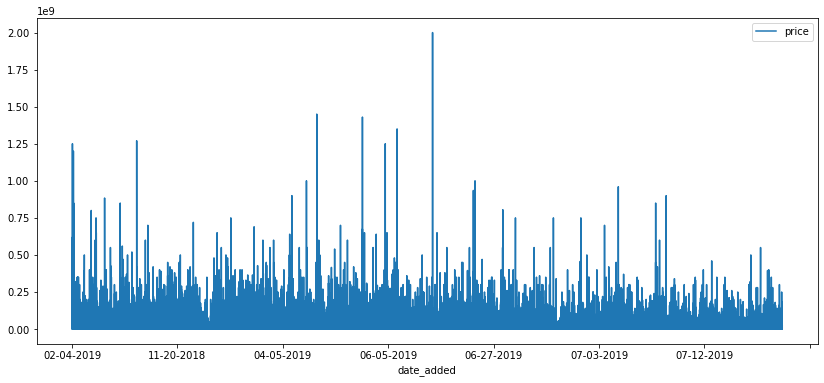

In [15]:
# visualizing the distribution of house prices vs the date added

data.('date_added', 'price',figsize=[14,6])

- We can see that most house prices were added between 02-04-2019 and 06-27-2019

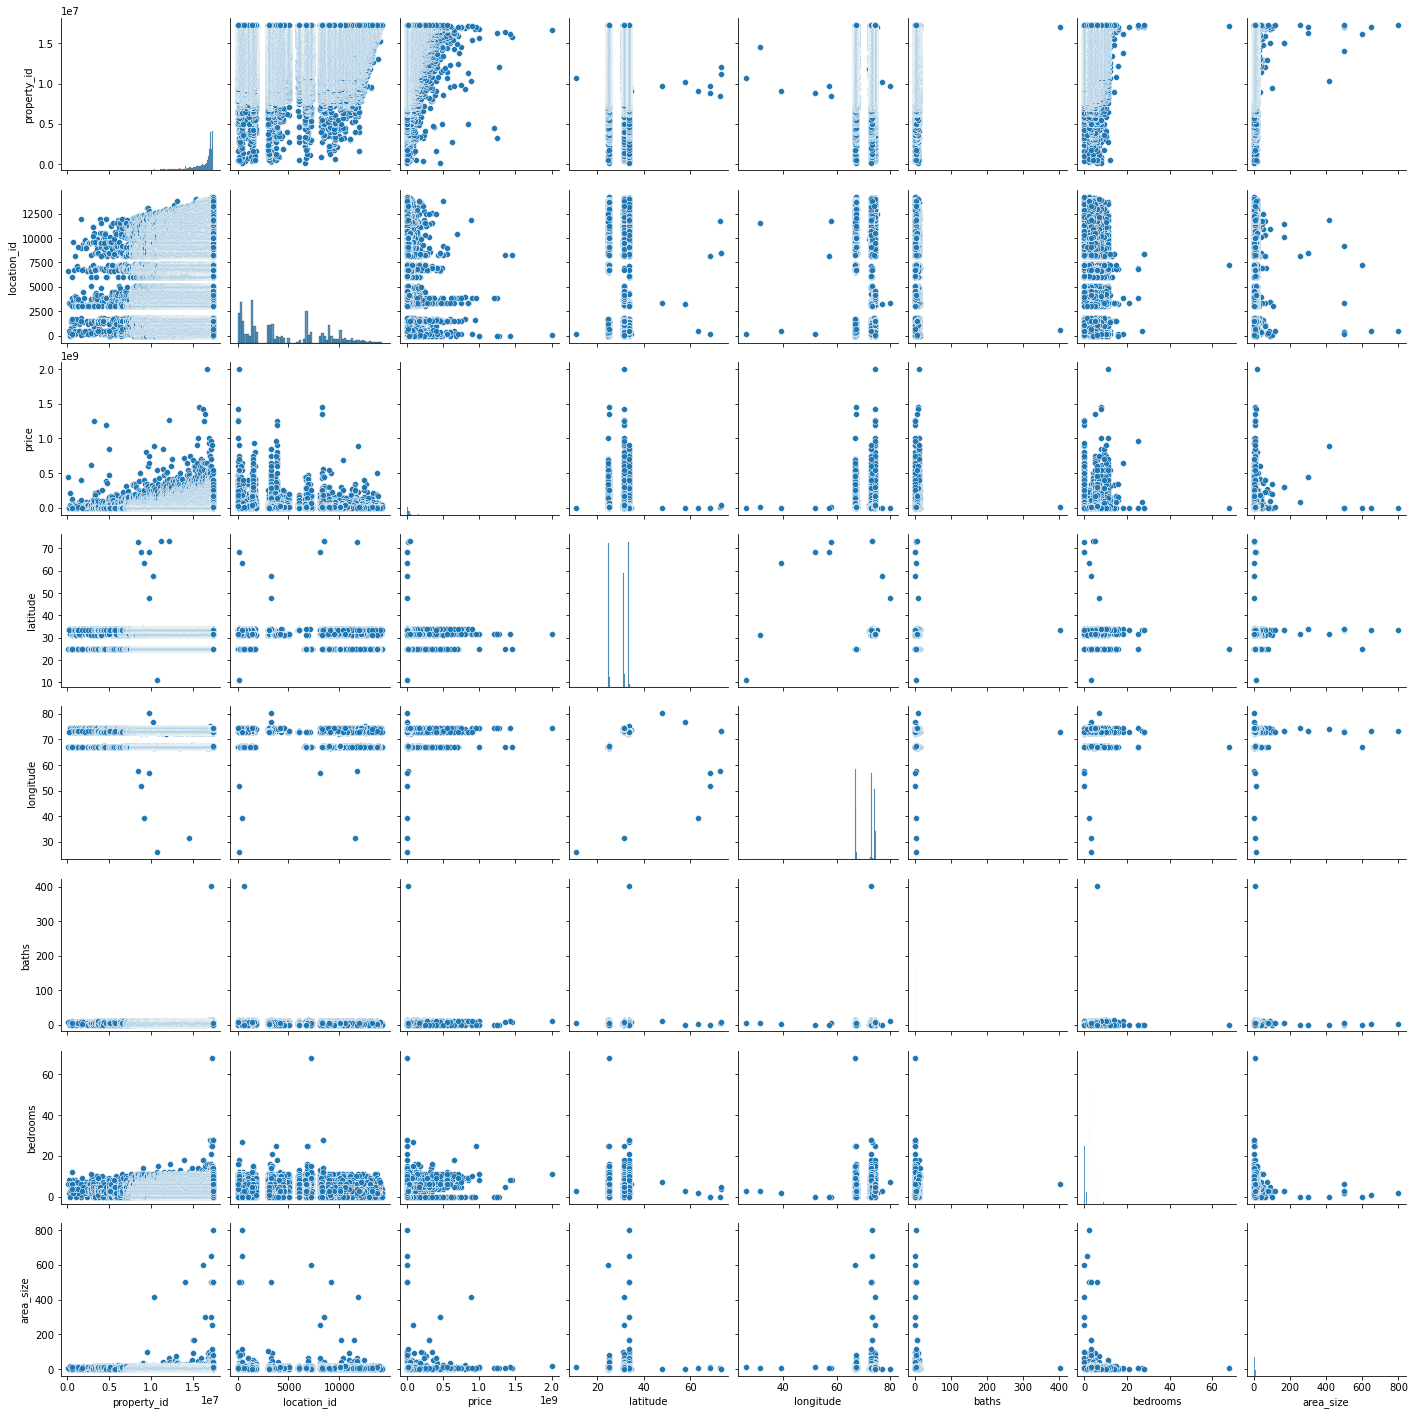

In [16]:
# seeing outliers by comparing different columns with each other

sns.pairplot(data)

- You can see some of the outliers here and remove it

<AxesSubplot:>

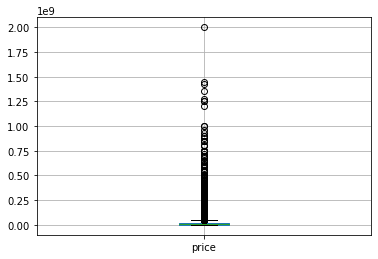

In [17]:
# visualizing price column with a box plot

data.boxplot(column='price')

- This plot shows that data is highly scattered and we have a lot of sparse values

<AxesSubplot:xlabel='price', ylabel='property_type'>

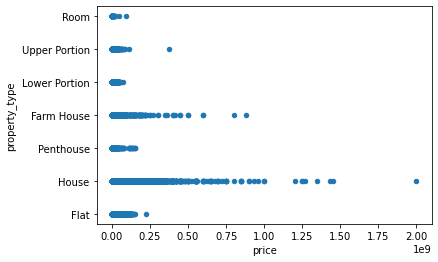

In [18]:
# visualizing price vs property type

data.plot.scatter(x='price',y='property_type')

- You can see outliers in price vs property_type space

In [19]:
data = data.fillna('NA')

In [20]:
data.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,area_type,area_size,area_category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NA,NA,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NA,NA,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NA,NA,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NA,NA,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [21]:
data['area_yard'] = np.where(data['area_type'] == 'Kanal',(data['area_size'] * 20)*30.2501, (data['area_size']*30.2501))
data.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,...,area,purpose,bedrooms,date_added,agency,agent,area_type,area_size,area_category,area_yard
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,...,4 Marla,For Sale,2,02-04-2019,NA,NA,Marla,4.0,0-5 Marla,121.00040
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,...,5.6 Marla,For Sale,3,05-04-2019,NA,NA,Marla,5.6,5-10 Marla,169.40056
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,...,8 Marla,For Sale,5,07-17-2019,NA,NA,Marla,8.0,5-10 Marla,242.00080
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,...,2 Kanal,For Sale,4,04-05-2019,NA,NA,Kanal,2.0,1-5 Kanal,1210.00400
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,...,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla,242.00080


In [22]:
data = data.drop(['property_id','location_id','page_url','location','latitude','longitude','area','date_added','agency','agent','area_type','area_size','area_category'], axis=1)

In [23]:
data['property_type'] = data['property_type'].astype('category').cat.codes
data['city'] = data['city'].astype('category').cat.codes
data['province_name'] = data['province_name'].astype('category').cat.codes
data['purpose'] = data['purpose'].astype('category').cat.codes

In [24]:
data.head()

,property_type,price,city,province_name,baths,purpose,bedrooms,area_yard
0,1,10000000,1,0,2,1,2,121.00040
1,1,6900000,1,0,3,1,3,169.40056
2,2,16500000,1,0,6,1,5,242.00080
3,2,43500000,1,0,4,1,4,1210.00400
4,2,7000000,1,0,3,1,3,242.00080


In [25]:
y = data['price']
X = data.drop(['price'], axis=1)

X.head()

,property_type,city,province_name,baths,purpose,bedrooms,area_yard
0,1,1,0,2,1,2,121.00040
1,1,1,0,3,1,3,169.40056
2,2,1,0,6,1,5,242.00080
3,2,1,0,4,1,4,1210.00400
4,2,1,0,3,1,3,242.00080


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
  
regressor = RandomForestRegressor() 
regressor.fit(X_train, y_train) 

y_pred = regressor.predict(X_test) 

In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

312762375361133.0
0.7478469084684312


In [28]:
import pickle 

pickle_out = open("regressor.pkl", "wb") 
pickle.dump(regressor, pickle_out) 
pickle_out.close()

In [29]:
X_train.head()

,property_type,city,province_name,baths,purpose,bedrooms,area_yard
127397,2,1,0,0,0,0,329.72609
59499,1,2,2,2,1,2,148.22549
23904,3,2,2,3,0,3,193.60064
95751,1,2,2,0,1,3,308.55102
51041,2,1,0,2,1,2,60.50020
